# Prework

Let's create some fake data to practice what we've learned so far about pandas. We'll create a dataframe that simulates some NBA games.

To get started, let's import numpy and pandas into this notebook:

In [6]:
import numpy as np
import pandas as pd

Now, we need to create some matchups. We'll use the current list of 30 NBA teams below and create matchups so that every team plays each other once.

In [7]:
teams = ['Atlanta Hawks', 'Boston Celtics', 'Brooklyn Nets', 'Charlotte Hornets', 'Chicago Bulls', 'Cleveland Cavaliers', 'Dallas Mavericks', 'Denver Nuggets', 'Detroit Pistons', 'Golden State Warriors', 'Houston Rockets', 'Indiana Pacers', 'Los Angeles Clippers', 'Los Angeles Lakers', 'Memphis Grizzlies', 'Miami Heat', 'Milwaukee Bucks', 'Minnesota Timberwolves', 'New Orleans Pelicans', 'New York Knicks', 'Oklahoma City Thunder', 'Orlando Magic', 'Philadelphia 76ers', 'Phoenix Suns', 'Portland Trail Blazers', 'Sacramento Kings', 'San Antonio Spurs', 'Toronto Raptors', 'Utah Jazz', 'Washington Wizards']

We'll use a nested for loop to create an array of matchups. Each matchup will be a dictionary containing the team and their opponent. Your output should look like this:

```python
matchups = [{'team': 'Atlanta Hawks', 'opponent': 'Boston Celtics'}, {'team': 'Atlanta Hawks', 'opponent': 'Brooklyn Nets'}, ...]
```

NOTE: Make sure no team plays themselves.

In [14]:
# Example
def foobar():
    pass
foobar()

In [13]:
matchups = []
for team in teams:
    for opponent in teams:
        if team == opponent:
            continue
        game = {}
        game['team'] = team
        game['opponent'] = opponent
        matchups.append(game)
#           print('team', team)
#           print('opponent', opponent)

matchups

[{'opponent': 'Boston Celtics', 'team': 'Atlanta Hawks'},
 {'opponent': 'Brooklyn Nets', 'team': 'Atlanta Hawks'},
 {'opponent': 'Charlotte Hornets', 'team': 'Atlanta Hawks'},
 {'opponent': 'Chicago Bulls', 'team': 'Atlanta Hawks'},
 {'opponent': 'Cleveland Cavaliers', 'team': 'Atlanta Hawks'},
 {'opponent': 'Dallas Mavericks', 'team': 'Atlanta Hawks'},
 {'opponent': 'Denver Nuggets', 'team': 'Atlanta Hawks'},
 {'opponent': 'Detroit Pistons', 'team': 'Atlanta Hawks'},
 {'opponent': 'Golden State Warriors', 'team': 'Atlanta Hawks'},
 {'opponent': 'Houston Rockets', 'team': 'Atlanta Hawks'},
 {'opponent': 'Indiana Pacers', 'team': 'Atlanta Hawks'},
 {'opponent': 'Los Angeles Clippers', 'team': 'Atlanta Hawks'},
 {'opponent': 'Los Angeles Lakers', 'team': 'Atlanta Hawks'},
 {'opponent': 'Memphis Grizzlies', 'team': 'Atlanta Hawks'},
 {'opponent': 'Miami Heat', 'team': 'Atlanta Hawks'},
 {'opponent': 'Milwaukee Bucks', 'team': 'Atlanta Hawks'},
 {'opponent': 'Minnesota Timberwolves', 'team

In [19]:
for game in matchups:
    team_score, opponent_score = np.random.choice(range(95,115), size=2, replace=False)
    location = np.random.choice(['H', 'A'])
    location
    game['team_score'] = team_score
    game['opponent_score'] = opponent_score
    game['location'] = location
    # print(team_score)
    # print(opponent_score)
matchups[0]

{'location': 'A',
 'opponent': 'Boston Celtics',
 'opponent_score': 113,
 'team': 'Atlanta Hawks',
 'team_score': 100}

Now let's iterate through our matchups and create a few data points:

1. The team's score
2. The opponent's score
3. Whether or not the game was home or away.

We'll also use numpy to randomly generate these values.

Our matchups will look like this when we're done:

```python
matchups = [
    {
        'opponent': 'Boston Celtics',
        'opponent_score': 93,
        'team': 'Atlanta Hawks',
        'team_score': 104,
        'location': 'H'
    },
    ...
]
```

{'location': 'A',
 'opponent': 'Boston Celtics',
 'opponent_score': 92,
 'team': 'Atlanta Hawks',
 'team_score': 97}

Now we can use our list of dictionaries to create a pandas dataframe.

In [21]:
df = pd.DataFrame(matchups)
df.head()

,location,opponent,opponent_score,team,team_score
0,A,Boston Celtics,113,Atlanta Hawks,100
1,A,Brooklyn Nets,110,Atlanta Hawks,102
2,A,Charlotte Hornets,96,Atlanta Hawks,101
3,H,Chicago Bulls,107,Atlanta Hawks,104
4,A,Cleveland Cavaliers,113,Atlanta Hawks,106


In [22]:
df.describe()

,opponent_score,team_score
count,870.000000,870.000000
mean,104.642529,104.440230
std,5.715928,5.642433
min,95.000000,95.000000
25%,100.000000,100.000000
50%,105.000000,104.000000
75%,109.000000,109.000000
max,114.000000,114.000000


In [23]:
df['location'].value_counts()

H    453
A    417
Name: location, dtype: int64

In [24]:
df.corr()

,opponent_score,team_score
opponent_score,1.000000,-0.056842
team_score,-0.056842,1.000000


In [27]:
%matplotlib inline

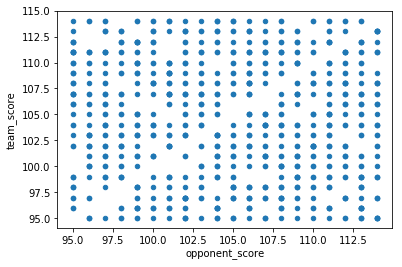

In [28]:
df.plot('opponent_score', 'team_score', kind='scatter')

In [30]:
df.isnull().sum()

location          0
opponent          0
opponent_score    0
team              0
team_score        0
dtype: int64

# Feature extraction in pandas

In data science, the features you choose to create or omit can be just as important as what machine learning model you choose to use.

Today, we're going to cover feature engineering in pandas.

## Broadcasting

If you recall, broadcasting enables us to perform mathemeatical operations across a vector without having to create a for loop. 

For practice, create a numpy array of numbers 1 - 10:

In [31]:
df['team_score'] + 1000

0      1100
1      1102
2      1101
3      1104
4      1106
5      1101
6      1102
7      1111
8      1107
9      1099
10     1104
11     1110
12     1106
13     1111
14     1105
15     1103
16     1099
17     1097
18     1099
19     1098
20     1113
21     1098
22     1097
23     1102
24     1098
25     1109
26     1095
27     1112
28     1108
29     1109
       ... 
840    1096
841    1114
842    1099
843    1113
844    1112
845    1104
846    1107
847    1095
848    1106
849    1099
850    1103
851    1099
852    1098
853    1112
854    1109
855    1104
856    1102
857    1100
858    1110
859    1100
860    1104
861    1113
862    1096
863    1101
864    1111
865    1104
866    1102
867    1102
868    1106
869    1104
Name: team_score, Length: 870, dtype: int64

Now, use broadcasting to double each number in the array:

Because pandas is built on numpy, we can create new features using broadcasting. With our nba dataframe, let's create a win column which will be `True` or `False`, depending on whether or not the team's score is higher than their opponent's.

In [33]:
df['team_score'] > df['opponent_score']

0      False
1      False
2       True
3      False
4      False
5      False
6      False
7       True
8       True
9      False
10     False
11      True
12      True
13      True
14      True
15      True
16     False
17     False
18     False
19     False
20     False
21      True
22     False
23      True
24     False
25      True
26     False
27      True
28     False
29      True
       ...  
840    False
841     True
842    False
843     True
844     True
845    False
846     True
847    False
848    False
849    False
850     True
851     True
852    False
853     True
854     True
855     True
856    False
857     True
858     True
859    False
860     True
861     True
862    False
863    False
864     True
865    False
866     True
867    False
868    False
869    False
Length: 870, dtype: bool

In [32]:
df['win'] = df['team_score'] > df['opponent_score']
df.head()

,location,opponent,opponent_score,team,team_score,win
0,A,Boston Celtics,113,Atlanta Hawks,100,False
1,A,Brooklyn Nets,110,Atlanta Hawks,102,False
2,A,Charlotte Hornets,96,Atlanta Hawks,101,True
3,H,Chicago Bulls,107,Atlanta Hawks,104,False
4,A,Cleveland Cavaliers,113,Atlanta Hawks,106,False


In machine learning, we need 1's and 0's instead of booleans, so let's change the win column's datatype to be `int`

In [37]:
df['win'] = df['win'].astype(int)
df.head()

,location,opponent,opponent_score,team,team_score,win
0,A,Boston Celtics,113,Atlanta Hawks,100,0
1,A,Brooklyn Nets,110,Atlanta Hawks,102,0
2,A,Charlotte Hornets,96,Atlanta Hawks,101,1
3,H,Chicago Bulls,107,Atlanta Hawks,104,0
4,A,Cleveland Cavaliers,113,Atlanta Hawks,106,0


## Broadcasting practice

Use broadcasting to create a new column called point spread, which is the difference between the team's score and their opponent's.

For example, if the team's score is 90 and their opponent's is 99, then the point spread is -9.

In [38]:
df['spread'] = df['team_score'] - df['opponent_score']
df.head()

,location,opponent,opponent_score,team,team_score,win,spread
0,A,Boston Celtics,113,Atlanta Hawks,100,0,-13
1,A,Brooklyn Nets,110,Atlanta Hawks,102,0,-8
2,A,Charlotte Hornets,96,Atlanta Hawks,101,1,5
3,H,Chicago Bulls,107,Atlanta Hawks,104,0,-3
4,A,Cleveland Cavaliers,113,Atlanta Hawks,106,0,-7


# Mapping

[Basketball Reference](http://www.basketball-reference.com/) is a fantastic site for NBA statistics. We might want to scrape this site down the road, so it's a good idea to know how to navigate to a particular team's page. Each team has a unique slug that is used in their urls. 

For example, Atlanta Hawks' url is http://www.basketball-reference.com/teams/ATL/, which means their slug is ATL. 

Below is a dictionary that **maps** each team to their respective slug (hence the name of this section). We'll use this dictionary to add a couple of columns to our data frame.

In [39]:
slug_dict = {'Atlanta Hawks':'ATL', 'Brooklyn Nets':'BRK', 'Boston Celtics':'BOS', 'Charlotte Hornets':'CHO', 'Chicago Bulls':'CHI', 'Cleveland Cavaliers':'CLE', 'Dallas Mavericks':'DAL', 'Denver Nuggets':'DEN', 'Detroit Pistons':'DET', 'Golden State Warriors':'GSW', 'Houston Rockets':'HOU', 'Indiana Pacers':'IND', 'Los Angeles Clippers':'LAC', 'Los Angeles Lakers':'LAL', 'Memphis Grizzlies':'MEM', 'Miami Heat':'MIA', 'Milwaukee Bucks':'MIL', 'Minnesota Timberwolves':'MIN', 'New Orleans Pelicans':'NOP', 'New York Knicks':'NYK', 'Oklahoma City Thunder':'OKC', 'Orlando Magic':'ORL', 'Philadelphia 76ers':'PHI', 'Phoenix Suns':'PHO', 'Portland Trail Blazers':'POR', 'Sacramento Kings':'SAC', 'San Antonio Spurs':'SAS', 'Toronto Raptors':'TOR', 'Utah Jazz':'UTA', 'Washington Wizards':'WAS'}
slug_dict

{'Atlanta Hawks': 'ATL',
 'Boston Celtics': 'BOS',
 'Brooklyn Nets': 'BRK',
 'Charlotte Hornets': 'CHO',
 'Chicago Bulls': 'CHI',
 'Cleveland Cavaliers': 'CLE',
 'Dallas Mavericks': 'DAL',
 'Denver Nuggets': 'DEN',
 'Detroit Pistons': 'DET',
 'Golden State Warriors': 'GSW',
 'Houston Rockets': 'HOU',
 'Indiana Pacers': 'IND',
 'Los Angeles Clippers': 'LAC',
 'Los Angeles Lakers': 'LAL',
 'Memphis Grizzlies': 'MEM',
 'Miami Heat': 'MIA',
 'Milwaukee Bucks': 'MIL',
 'Minnesota Timberwolves': 'MIN',
 'New Orleans Pelicans': 'NOP',
 'New York Knicks': 'NYK',
 'Oklahoma City Thunder': 'OKC',
 'Orlando Magic': 'ORL',
 'Philadelphia 76ers': 'PHI',
 'Phoenix Suns': 'PHO',
 'Portland Trail Blazers': 'POR',
 'Sacramento Kings': 'SAC',
 'San Antonio Spurs': 'SAS',
 'Toronto Raptors': 'TOR',
 'Utah Jazz': 'UTA',
 'Washington Wizards': 'WAS'}

We'll use pandas' `map` method along with our dictionary to create a `'team_slug'` column:

In [47]:
{v:k for k, v in slug_dict.items()}

{'ATL': 'Atlanta Hawks',
 'BOS': 'Boston Celtics',
 'BRK': 'Brooklyn Nets',
 'CHI': 'Chicago Bulls',
 'CHO': 'Charlotte Hornets',
 'CLE': 'Cleveland Cavaliers',
 'DAL': 'Dallas Mavericks',
 'DEN': 'Denver Nuggets',
 'DET': 'Detroit Pistons',
 'GSW': 'Golden State Warriors',
 'HOU': 'Houston Rockets',
 'IND': 'Indiana Pacers',
 'LAC': 'Los Angeles Clippers',
 'LAL': 'Los Angeles Lakers',
 'MEM': 'Memphis Grizzlies',
 'MIA': 'Miami Heat',
 'MIL': 'Milwaukee Bucks',
 'MIN': 'Minnesota Timberwolves',
 'NOP': 'New Orleans Pelicans',
 'NYK': 'New York Knicks',
 'OKC': 'Oklahoma City Thunder',
 'ORL': 'Orlando Magic',
 'PHI': 'Philadelphia 76ers',
 'PHO': 'Phoenix Suns',
 'POR': 'Portland Trail Blazers',
 'SAC': 'Sacramento Kings',
 'SAS': 'San Antonio Spurs',
 'TOR': 'Toronto Raptors',
 'UTA': 'Utah Jazz',
 'WAS': 'Washington Wizards'}

In [41]:
df['team_slug'] = df['team'].map(slug_dict)
df.head()

,location,opponent,opponent_score,team,team_score,win,spread,team_slug
0,A,Boston Celtics,113,Atlanta Hawks,100,0,-13,ATL
1,A,Brooklyn Nets,110,Atlanta Hawks,102,0,-8,ATL
2,A,Charlotte Hornets,96,Atlanta Hawks,101,1,5,ATL
3,H,Chicago Bulls,107,Atlanta Hawks,104,0,-3,ATL
4,A,Cleveland Cavaliers,113,Atlanta Hawks,106,0,-7,ATL


## Mapping practice

Using `slug_dict`, create a new column for the opponent's slug:

In [50]:
df['opponent_slug'] = df['opponent'].map(slug_dict)
df.head()

,location,opponent,opponent_score,team,team_score,win,spread,team_slug,opponent_slug
0,A,Boston Celtics,113,Atlanta Hawks,100,0,-13,ATL,BOS
1,A,Brooklyn Nets,110,Atlanta Hawks,102,0,-8,ATL,BRK
2,A,Charlotte Hornets,96,Atlanta Hawks,101,1,5,ATL,CHO
3,H,Chicago Bulls,107,Atlanta Hawks,104,0,-3,ATL,CHI
4,A,Cleveland Cavaliers,113,Atlanta Hawks,106,0,-7,ATL,CLE


In [52]:
df['encoded_location'] = df['location'].map({'A': 0, 'H': 1})
df.head()

,location,opponent,opponent_score,team,team_score,win,spread,team_slug,opponent_slug,encoded_location
0,A,Boston Celtics,113,Atlanta Hawks,100,0,-13,ATL,BOS,0
1,A,Brooklyn Nets,110,Atlanta Hawks,102,0,-8,ATL,BRK,0
2,A,Charlotte Hornets,96,Atlanta Hawks,101,1,5,ATL,CHO,0
3,H,Chicago Bulls,107,Atlanta Hawks,104,0,-3,ATL,CHI,1
4,A,Cleveland Cavaliers,113,Atlanta Hawks,106,0,-7,ATL,CLE,0


# Apply

Pandas allows us to use functions to transform our data. Typically this is done in two steps:

1. Create the function you will use to transform your data frame
2. Use the `apply` method to run this function across your data frame.

In our NBA example, let's change our slug columns to be the full url for each team/opponent. 

First, let's create a function that accepts a slug and returns the full Basketball Reference url for that slug:

In [54]:
def create_url_from_slug(slug):
    return 'https://www.basketball-reference.com/teams/{}/'.format(slug)

create_url_from_slug('ATL')

'https://www.basketball-reference.com/teams/ATL/'

Now let's use this function to change our `team_slug` column to be the full url:

In [55]:
df['team_slug'].apply(create_url_from_slug)

0      https://www.basketball-reference.com/teams/ATL/
1      https://www.basketball-reference.com/teams/ATL/
2      https://www.basketball-reference.com/teams/ATL/
3      https://www.basketball-reference.com/teams/ATL/
4      https://www.basketball-reference.com/teams/ATL/
5      https://www.basketball-reference.com/teams/ATL/
6      https://www.basketball-reference.com/teams/ATL/
7      https://www.basketball-reference.com/teams/ATL/
8      https://www.basketball-reference.com/teams/ATL/
9      https://www.basketball-reference.com/teams/ATL/
10     https://www.basketball-reference.com/teams/ATL/
11     https://www.basketball-reference.com/teams/ATL/
12     https://www.basketball-reference.com/teams/ATL/
13     https://www.basketball-reference.com/teams/ATL/
14     https://www.basketball-reference.com/teams/ATL/
15     https://www.basketball-reference.com/teams/ATL/
16     https://www.basketball-reference.com/teams/ATL/
17     https://www.basketball-reference.com/teams/ATL/
18     htt

In [57]:
df['team_url'] = df['team_slug'].apply(create_url_from_slug)
df.head()

,location,opponent,opponent_score,team,team_score,win,spread,team_slug,opponent_slug,encoded_location,team_url
0,A,Boston Celtics,113,Atlanta Hawks,100,0,-13,ATL,BOS,0,https://www.basketball-reference.com/teams/ATL/
1,A,Brooklyn Nets,110,Atlanta Hawks,102,0,-8,ATL,BRK,0,https://www.basketball-reference.com/teams/ATL/
2,A,Charlotte Hornets,96,Atlanta Hawks,101,1,5,ATL,CHO,0,https://www.basketball-reference.com/teams/ATL/
3,H,Chicago Bulls,107,Atlanta Hawks,104,0,-3,ATL,CHI,1,https://www.basketball-reference.com/teams/ATL/
4,A,Cleveland Cavaliers,113,Atlanta Hawks,106,0,-7,ATL,CLE,0,https://www.basketball-reference.com/teams/ATL/


Now do the same for `opponent_slug`:

In [60]:
df['opponent_url'] = df['opponent_slug'].apply(create_url_from_slug)
df.head()

,location,opponent,opponent_score,team,team_score,win,spread,team_slug,opponent_slug,encoded_location,team_url,opponent_url
0,A,Boston Celtics,113,Atlanta Hawks,100,0,-13,ATL,BOS,0,https://www.basketball-reference.com/teams/ATL/,https://www.basketball-reference.com/teams/BOS/
1,A,Brooklyn Nets,110,Atlanta Hawks,102,0,-8,ATL,BRK,0,https://www.basketball-reference.com/teams/ATL/,https://www.basketball-reference.com/teams/BRK/
2,A,Charlotte Hornets,96,Atlanta Hawks,101,1,5,ATL,CHO,0,https://www.basketball-reference.com/teams/ATL/,https://www.basketball-reference.com/teams/CHO/
3,H,Chicago Bulls,107,Atlanta Hawks,104,0,-3,ATL,CHI,1,https://www.basketball-reference.com/teams/ATL/,https://www.basketball-reference.com/teams/CHI/
4,A,Cleveland Cavaliers,113,Atlanta Hawks,106,0,-7,ATL,CLE,0,https://www.basketball-reference.com/teams/ATL/,https://www.basketball-reference.com/teams/CLE/


### Cleanup: 

Because our columns are now the full url, and not just the slug, it makes sense for use to change the names of our columns:

Not every win in the NBA is the same. An inferior team might be favored simply because they're playing at home. Some [basketball statistics](https://en.wikipedia.org/wiki/Rating_Percentage_Index#Basketball_formula) account for this by reducing the value of a home win (and increasing the value of an away win). 

We'll create a new column called `'adjusted_win'`, which will be 0.6 wins if they won at home and 1.4 wins if they won on the road.

We'll use pandas `apply` method to create this new column.

First, create a function that accepts an individual row as a parameter. 
- If the game was at home, we'll multiply the win column by 0.6
- If the game was played on the raod, multiply the win column by 1.4
- NOTE: If the win column is zero, then our result will be zero

In [64]:
def adjusted_win(row):
    if row['location'] == 'H':
        return row['win'] * 0.6
    else:
        return row['win'] * 1.4

df['adjusted_win'] = df.apply(adjusted_win, axis=1) # .appy() you always pass a function
df.head()

,location,opponent,opponent_score,team,team_score,win,spread,team_slug,opponent_slug,encoded_location,team_url,opponent_url,adjusted_win
0,A,Boston Celtics,113,Atlanta Hawks,100,0,-13,ATL,BOS,0,https://www.basketball-reference.com/teams/ATL/,https://www.basketball-reference.com/teams/BOS/,0.0
1,A,Brooklyn Nets,110,Atlanta Hawks,102,0,-8,ATL,BRK,0,https://www.basketball-reference.com/teams/ATL/,https://www.basketball-reference.com/teams/BRK/,0.0
2,A,Charlotte Hornets,96,Atlanta Hawks,101,1,5,ATL,CHO,0,https://www.basketball-reference.com/teams/ATL/,https://www.basketball-reference.com/teams/CHO/,1.4
3,H,Chicago Bulls,107,Atlanta Hawks,104,0,-3,ATL,CHI,1,https://www.basketball-reference.com/teams/ATL/,https://www.basketball-reference.com/teams/CHI/,0.0
4,A,Cleveland Cavaliers,113,Atlanta Hawks,106,0,-7,ATL,CLE,0,https://www.basketball-reference.com/teams/ATL/,https://www.basketball-reference.com/teams/CLE/,0.0


Now we'll use the `apply` method, along with our function to create the adjusted_win column. 

Note: We'll have to make a slight change to our `apply` method since we're dealing with multiple columns

# Dummies (AKA One Hot Encoding)

We might want to incorporate the game's location in our machine learning model. There's just one problem: we need numerical values, but we have strings.

Thankfully pandas has a method for converting categorical data into numerical data. We'll use `get_dummies` to create numerical columns from our `location` column:

## Dummies practice

Create dummy columns from the `team` and `opponent` columns: